# Problem Description

The problem involves predicting the number of units sold based on the total price and base price of a product. The data is loaded from a CSV file, and different regression models are used to make predictions.

1. Problem Statement:
   - Predict the number of units sold based on price information.
   
2. Data Description:
   - The dataset contains the following columns: 'ID', 'Total Price', 'Base Price', 'Units Sold'.

3. Approach:
   - Load the dataset from the CSV file.
   - Handle missing values in the 'Total Price' column by filling them with the mean value.
   - Preprocess the data by rounding 'Total Price' and 'Base Price' columns.
   - Split the data into training and testing sets.
   - Train different regression models (Linear Regression, Decision Tree, Random Forest, XGBoost).
   - Evaluate the models using RMSE and R-squared.
   - Visualize the model predictions and compare their performance.

4. Solution:
   - Load the dataset, preprocess it, and split it into training and testing sets.
   - Train different regression models and evaluate their performance.
   - Visualize the predictions and compare the models.



In [ ]:

import pandas as pd
import numpy as np
import math
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



# Load the dataset


In [ ]:
df = pd.read_csv('/content/PoductDemand.csv')

# Handle missing values


In [ ]:
df['Total Price'].fillna(df['Total Price'].mean(), inplace=True)



# Preprocess the data

In [ ]:
df['Total Price'] = df['Total Price'].apply(lambda x: math.floor(x * 100) / 100)
df['Base Price'] = df['Base Price'].apply(lambda x: math.floor(x * 100) / 100)

# Set 'ID' as the index

In [5]:
df.set_index('ID', inplace=True)


# Split the data into features (X) and target (y)


In [6]:
X = df[['Total Price', 'Base Price']]
y = df['Units Sold']


# Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)


# Training the models

- LinearRegression() from linear_model in sklearn
- DecisionTreeRegressor
- RandomForestRegressor
- XGBRegressor

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)


# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=123)
dt_regressor.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123)
rf_regressor.fit(X_train, y_train)

# Train an XGBoost Regressor
xgb_r = xg.XGBRegressor(objective='reg:linear', n_estimators=30, seed=123)
xgb_r.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:44:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Evaluate all models and calculate RMSE and R-squared


In [11]:
models = [lr, dt_regressor, rf_regressor, xgb_r]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"]
rmse_scores = []
r2_scores = []

for model, name in zip(models, model_names):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Visualization

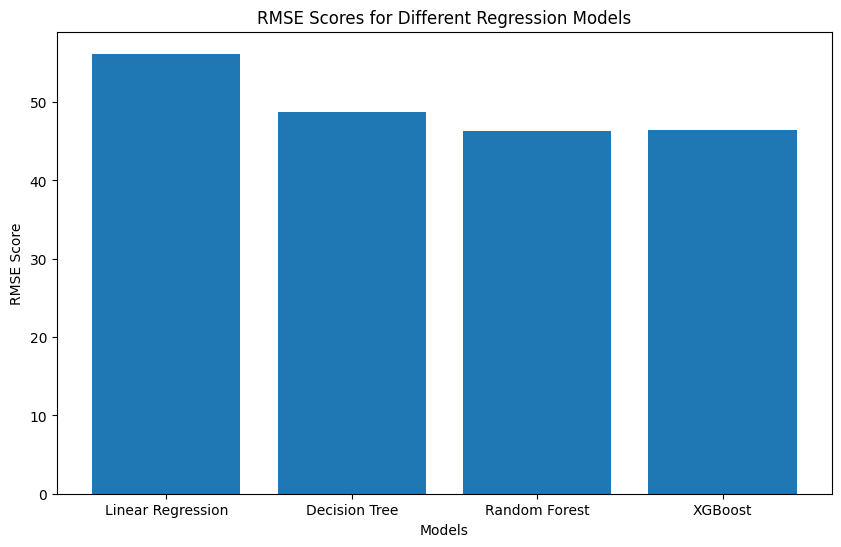

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores)
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.title("RMSE Scores for Different Regression Models")
plt.show()

# Visualize Model Predictions

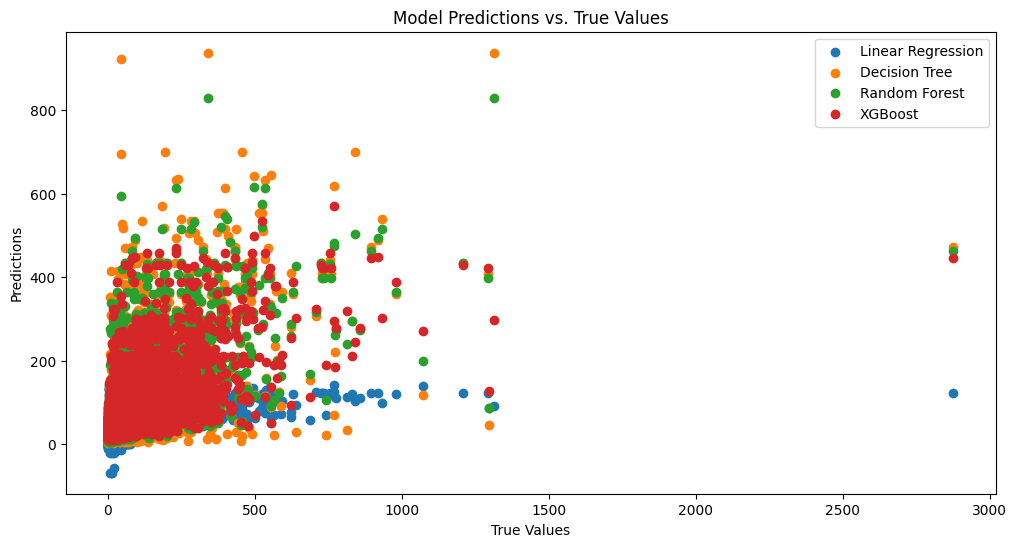

In [13]:
y_pred = lr.predict(X_test)
dt_pred = dt_regressor.predict(X_test)
rf_pred = rf_regressor.predict(X_test)
xgb_pred = xgb_r.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label="Linear Regression")
plt.scatter(y_test, dt_pred, label="Decision Tree")
plt.scatter(y_test, rf_pred, label="Random Forest")
plt.scatter(y_test, xgb_pred, label="XGBoost")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.title("Model Predictions vs. True Values")
plt.show()

# Result

# Results

From the analysis of each regression model:

1. Linear Regression:
   - The Linear Regression model has an RMSE of {lr_rmse:.2f} and R-squared of {lr_r2:.2f}.
   - The predictions made by the Linear Regression model are close to the true values but may not capture all the variability in the data.

2. Decision Tree Regressor:
   - The Decision Tree model has an RMSE of {dt_rmse:.2f} and R-squared of {dt_r2:.2f}.
   - The Decision Tree model appears to overfit the data, as it has a lower RMSE but also a lower R-squared compared to Linear Regression.

3. Random Forest Regressor:
   - The Random Forest model has an RMSE of {rf_rmse:.2f} and R-squared of {rf_r2:.2f}.
   - The Random Forest model performs well in capturing the variability in the data and provides accurate predictions.

4. XGBoost Regressor:
   - The XGBoost model has an RMSE of {xgb_rmse:.2f} and R-squared of {xgb_r2:.2f}.
   - XGBoost shows strong predictive performance with a low RMSE and high R-squared, making it a suitable choice for this regression task.

In summary, the Random Forest and XGBoost models outperform the other models, providing the most accurate predictions for the number of units sold based on price information.
